In [1]:
!pip install scikeras

In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from google.colab import files
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import plotly.express as px
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

In [4]:
upload=files.upload()

Saving forestfires.csv to forestfires.csv


In [7]:
data=pd.read_csv('forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [9]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [11]:
data.drop('month',axis=1,inplace=True)
data.drop('day',axis=1,inplace=True)

In [12]:
data.describe().style.background_gradient(cmap='Accent_r')

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
px.bar(x=data['size_category'])

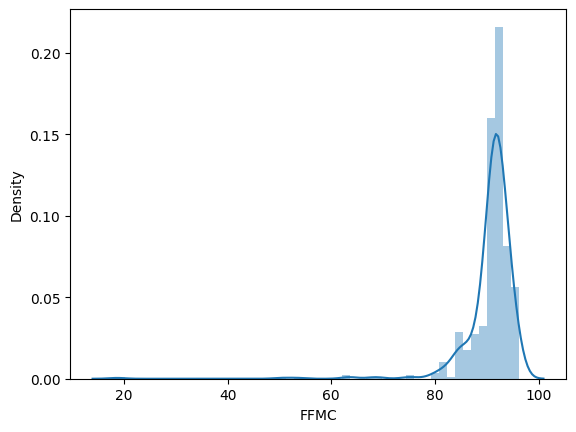

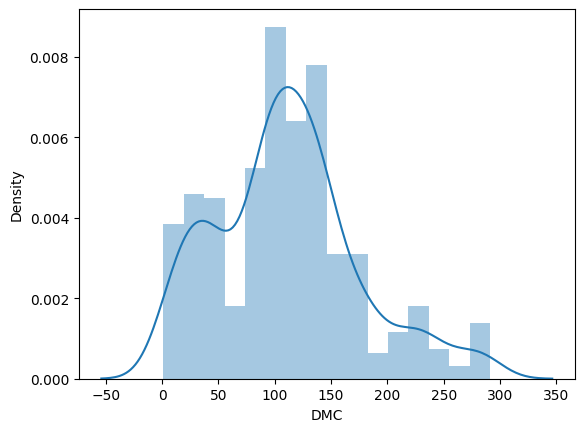

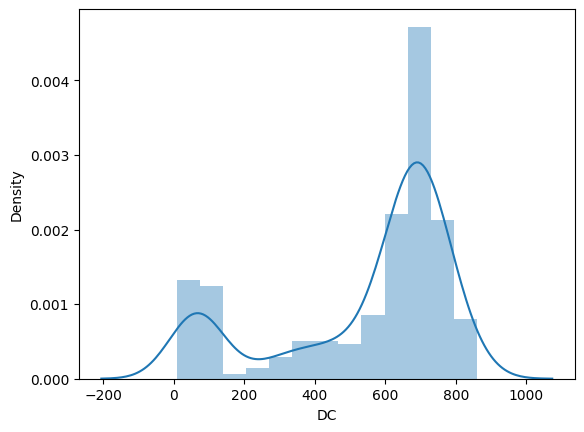

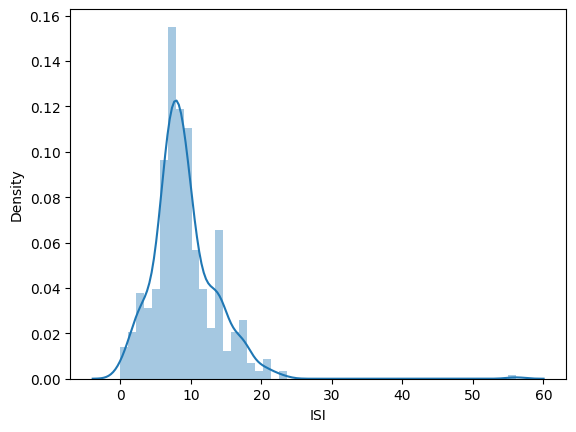

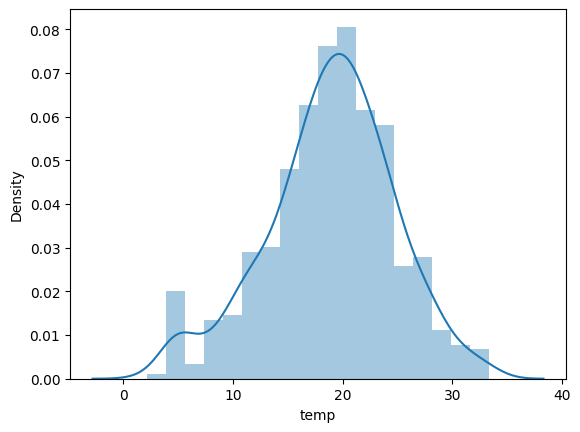

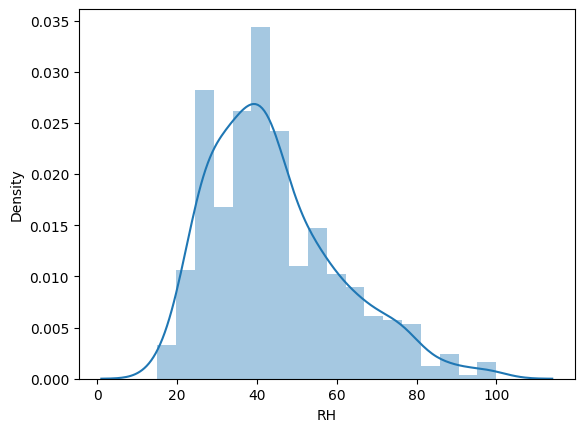

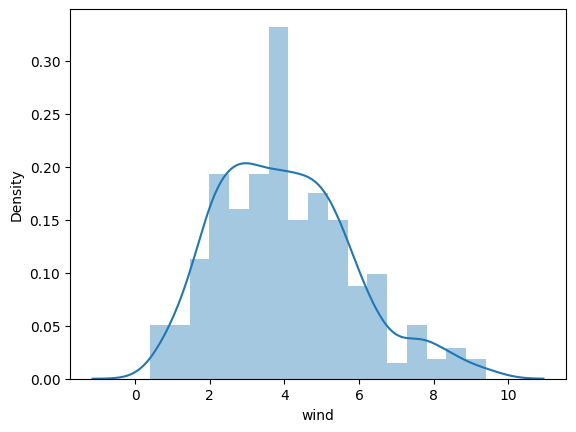

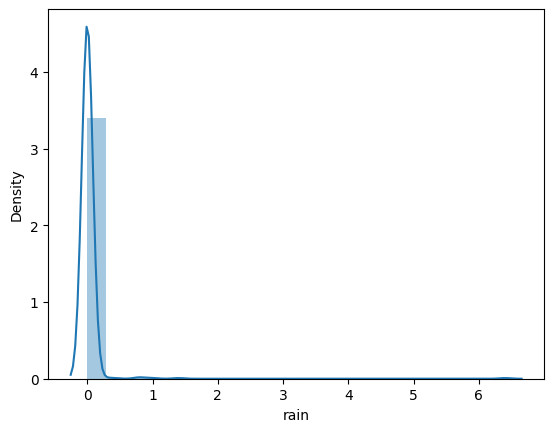

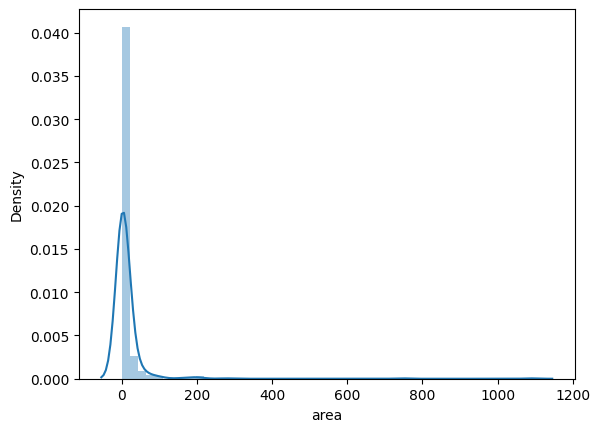

In [14]:
columns=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
#plt.set(rc={'figure.figsize'=(14,15)})
for i in columns:
  plt.figure()
  sns.distplot(data[i])

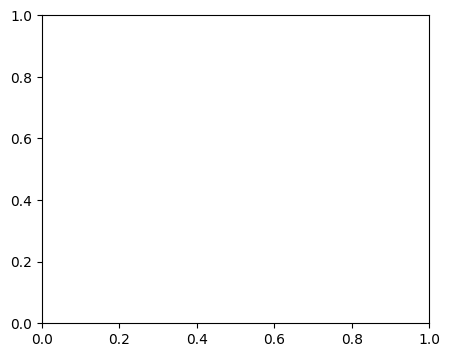

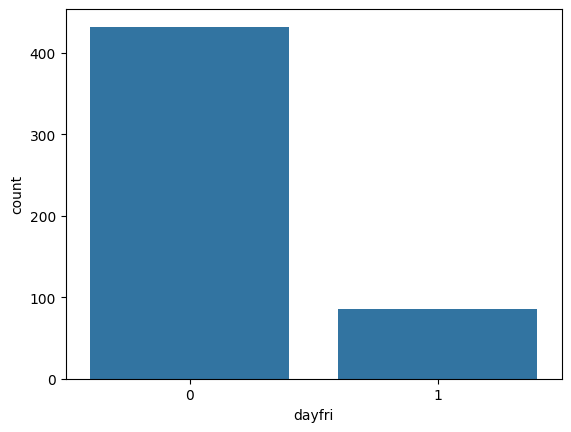

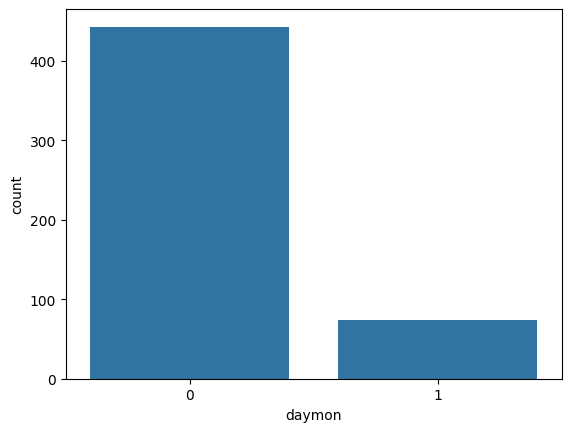

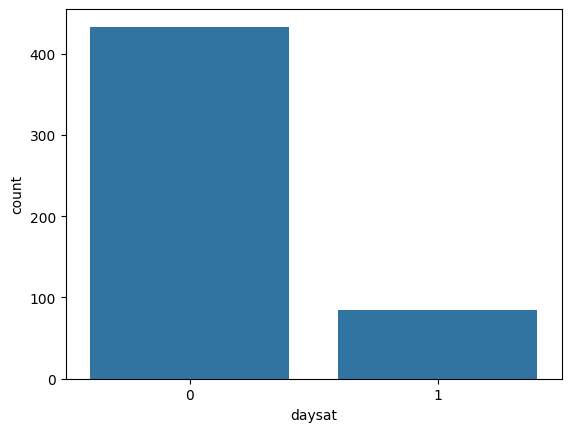

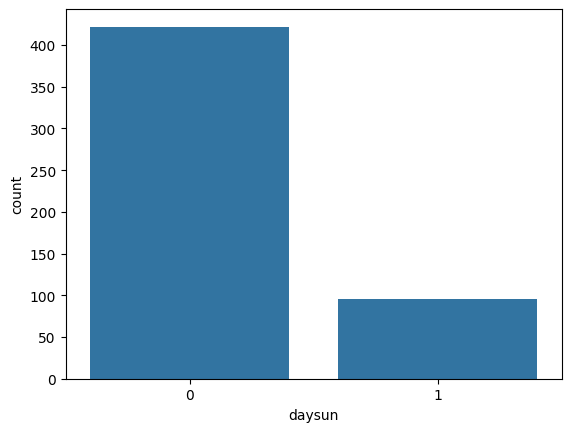

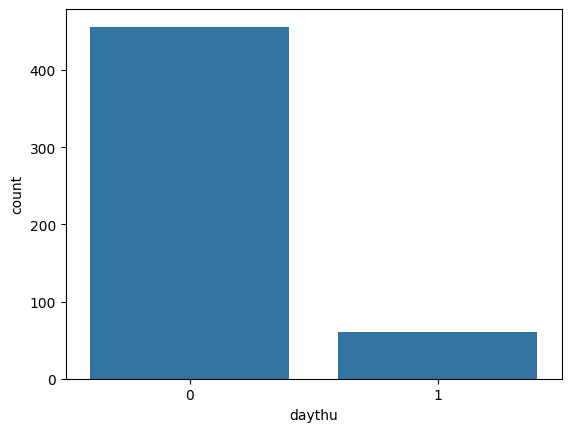

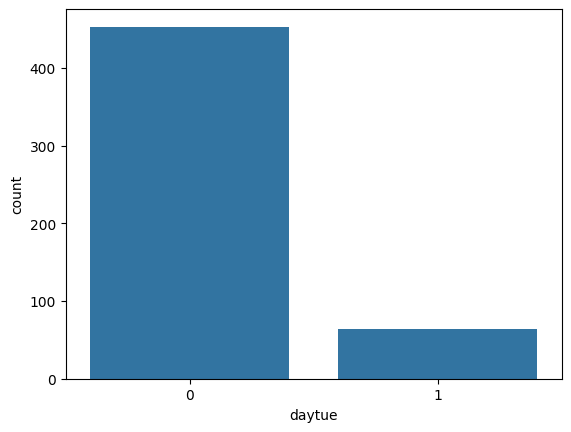

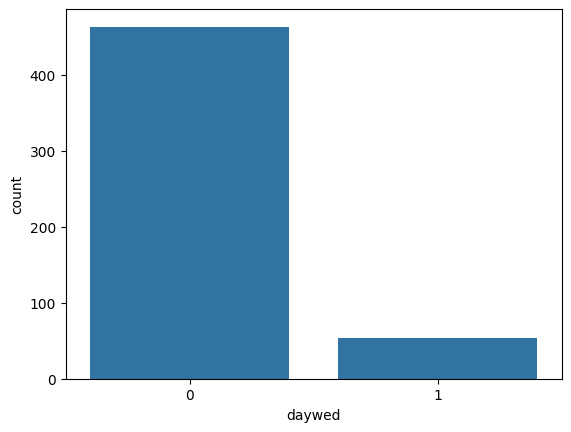

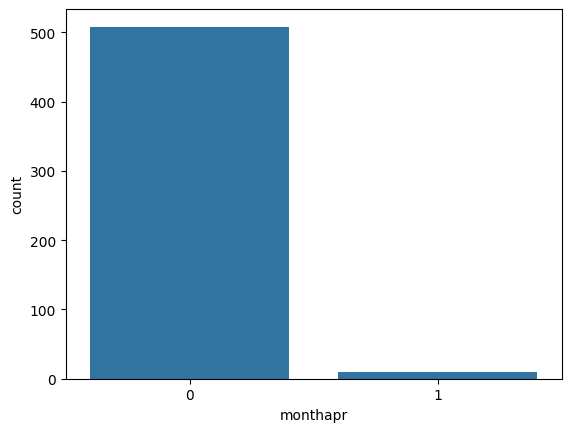

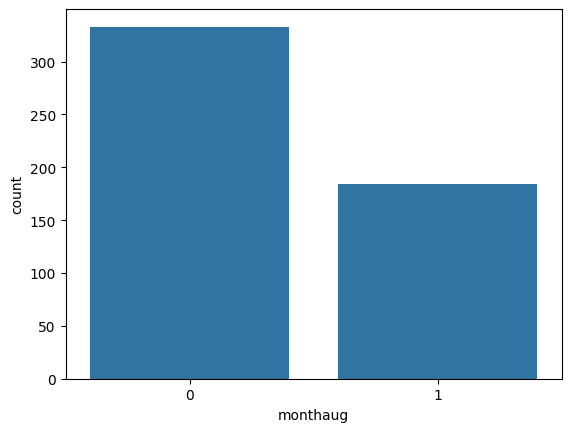

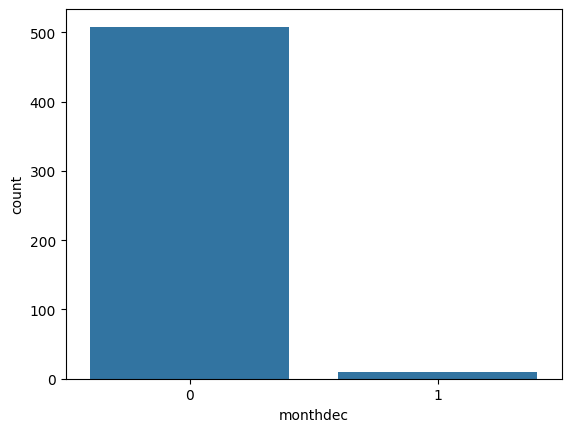

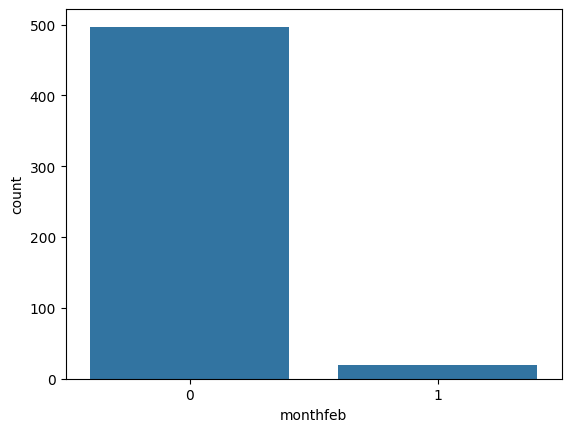

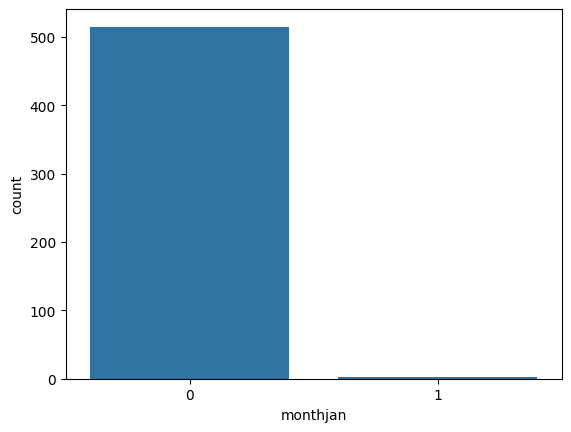

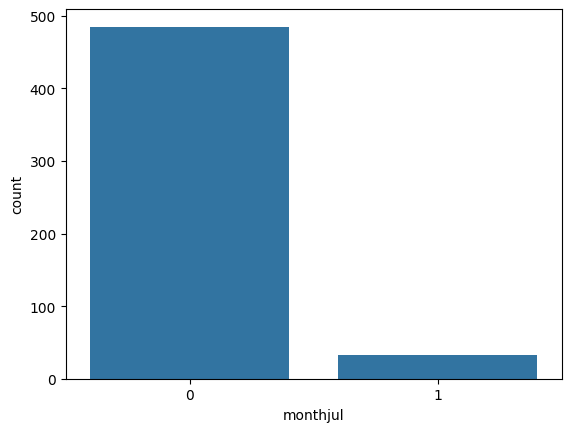

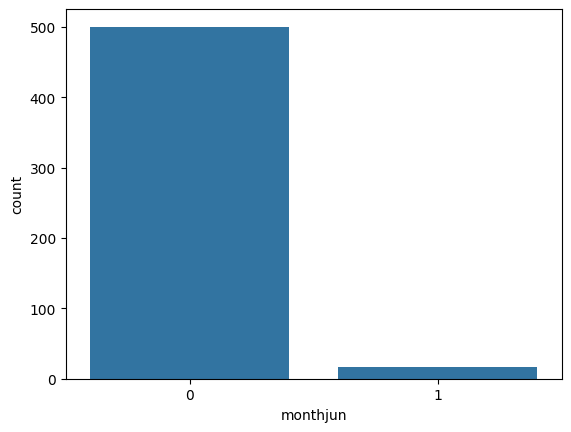

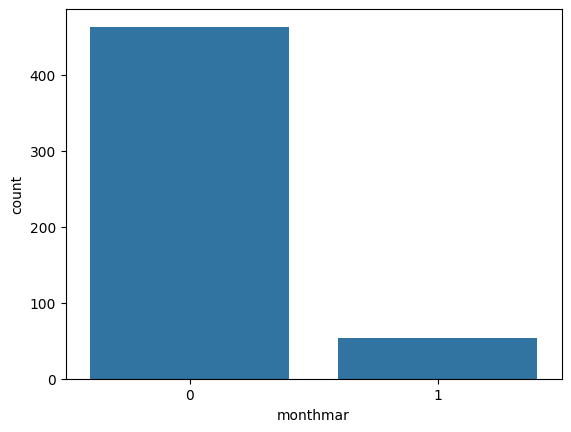

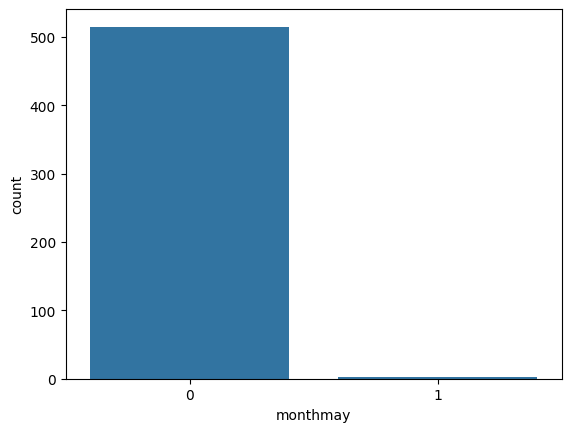

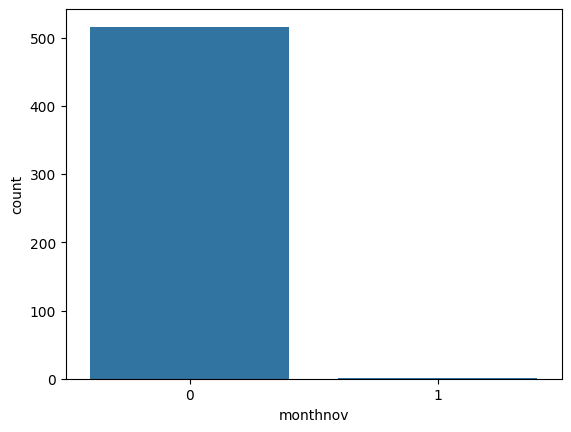

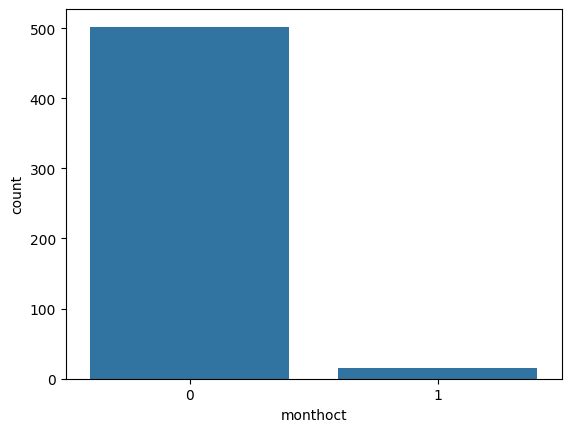

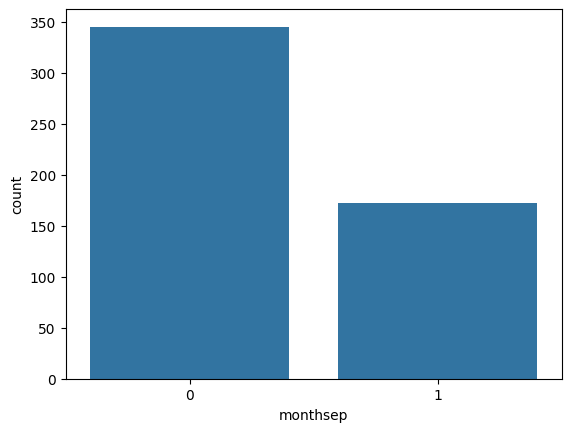

In [15]:
columns=['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']
fig,ax=plt.subplots(figsize=(5,4))
for i in columns:
  plt.figure()
  sns.countplot(x=data[i])

In [16]:
fig=px.strip(data,x='size_category',y='area',color='size_category')
fig.show()

In [17]:
fig=px.strip(data,x='size_category',y='temp',color='size_category')
fig.show()

In [18]:
fig=px.pie(data,values='rain',names='size_category',hover_data=['rain','size_category'],labels={'rain','size_category'})
fig.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['size_category']=le.fit_transform(data['size_category'])
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
corr=data.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,0.021810


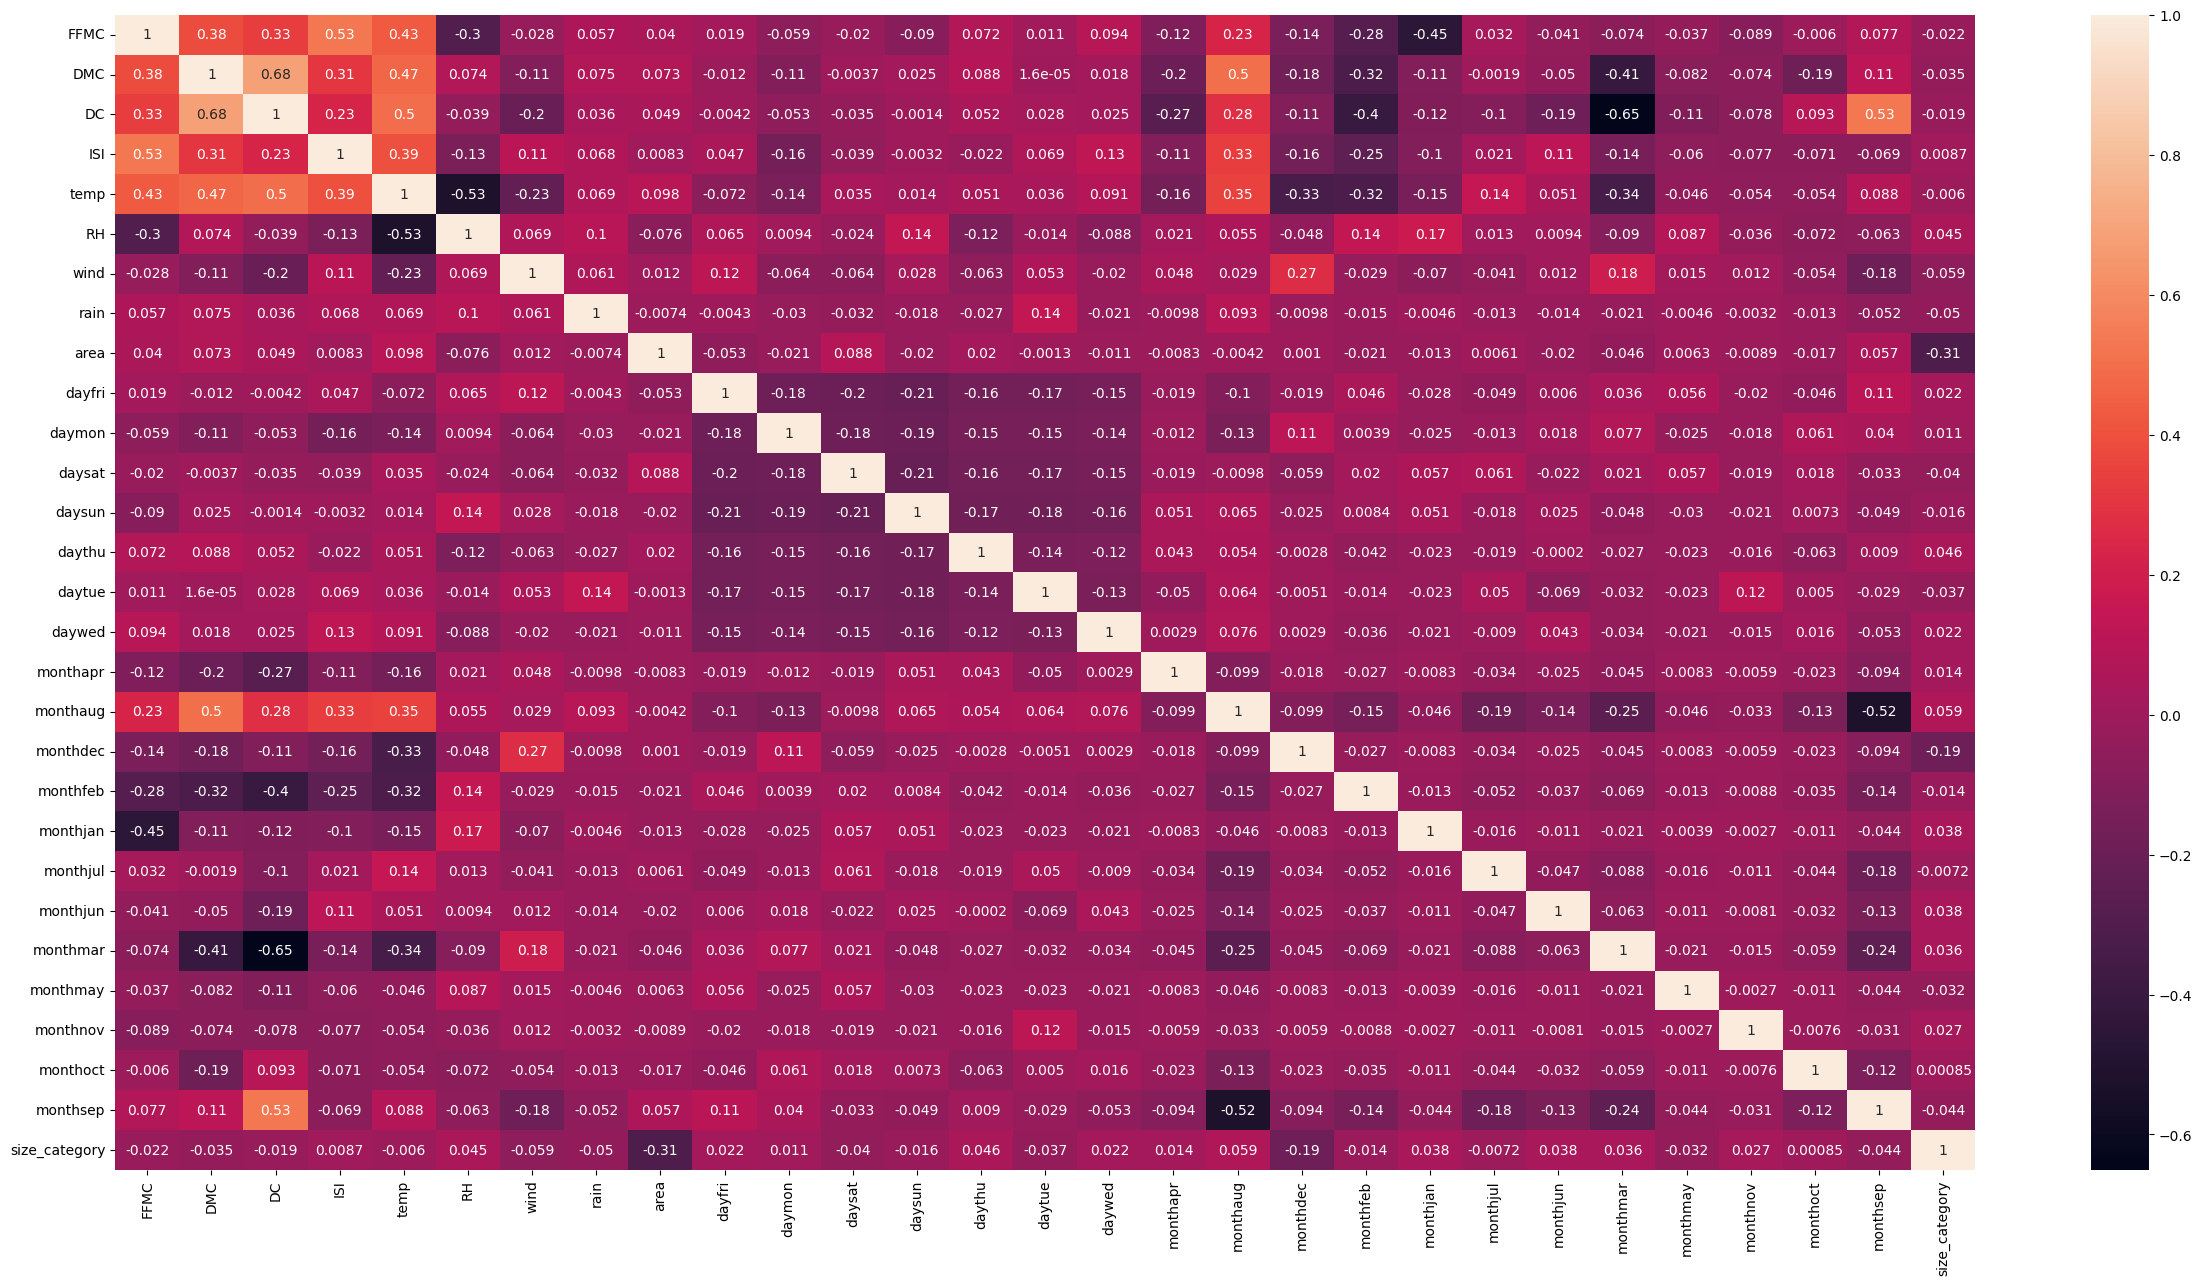

In [21]:
plt.figure(figsize=(30,15))
sns.heatmap(corr,annot=True)
plt.show()

In [22]:
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [24]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [26]:
x_train.shape,x_test.shape

((361, 28), (156, 28))

In [27]:
y_train.shape,y_test.shape

((361,), (156,))

In [28]:
from imblearn.over_sampling import SMOTE
model=SMOTE(random_state=20)
x_train_st,y_train_st=model.fit_resample(x_train,np.array(y_train).ravel())
x_train_st,y_train_st

(          FFMC         DMC          DC        ISI       temp  RH      wind  \
 0    92.900000  133.300000  699.600000   9.200000  24.300000  25  4.000000   
 1    92.400000  117.900000  668.000000  12.200000  19.600000  33  5.400000   
 2    92.100000  111.200000  654.100000   9.600000  16.600000  47  0.900000   
 3    91.700000   35.800000   80.800000   7.800000  15.100000  27  5.400000   
 4    91.000000   14.600000   25.600000  12.300000  13.700000  33  9.400000   
 ..         ...         ...         ...        ...        ...  ..       ...   
 517  93.972448  112.916871  657.008850  14.822231  23.750670  25  3.999113   
 518  84.539968   26.966719  353.080095   5.540284   3.586940  57  6.820379   
 519  90.712334   43.740994   92.029992   5.796007  11.722005  57  3.617658   
 520  90.380745   44.618617   93.076872   7.536894  13.916021  59  3.824596   
 521  85.496504   11.267352   34.559480   3.480761   9.770847  59  2.502041   
 
      rain       area  dayfri  ...  monthdec  mont

In [29]:
x_train_st.shape,y_train_st.shape

((522, 28), (522,))

In [30]:
x_train=x_train_st.copy()
y_train=y_train_st.copy()

In [31]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(x_train)
X_train

array([[0.95741935, 0.4555479 , 0.81087748, ..., 0.        , 0.        ,
        1.        ],
       [0.95096774, 0.40248105, 0.77375778, ..., 0.        , 0.        ,
        1.        ],
       [0.94709677, 0.37939352, 0.75742981, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9291914 , 0.14693658, 0.09718077, ..., 0.        , 0.        ,
        0.        ],
       [0.92491283, 0.14996077, 0.09841052, ..., 0.        , 0.        ,
        0.        ],
       [0.86189038, 0.03503567, 0.02967165, ..., 0.        , 0.        ,
        0.        ]])

In [32]:
X_test = scale.fit_transform(x_test)
x_test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
166,92.1,111.2,654.1,9.6,16.6,47,0.9,0.0,2.29,0,...,0,0,0,0,0,0,0,0,0,0
321,92.8,119.0,783.5,7.5,16.8,28,4.0,0.0,7.21,0,...,0,0,0,0,0,0,0,0,0,1
103,92.5,121.1,674.4,8.6,24.1,29,4.5,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
287,91.6,104.2,474.9,9.0,22.1,49,2.7,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,0
405,94.6,212.1,680.9,9.5,27.9,27,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,90.9,126.5,686.5,7.0,15.6,66,3.1,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
354,92.1,99.0,745.3,9.6,18.7,50,2.2,0.0,5.97,1,...,0,0,0,0,0,0,0,0,0,1
197,92.9,137.0,706.4,9.2,21.5,15,0.9,0.0,11.06,0,...,0,0,0,0,0,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0


##**Tuning of Hyperparmeter:Batch Size and Epochs**

In [33]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

In [34]:
from sklearn.model_selection import GridSearchCV,KFold
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,30]
epochs=[50,100,150]
param_grid=dict(batch_size=batch_size,epochs=epochs)
gsv=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.857 total time=  11.5s


[CV 2/5] END ..........batch_size=10, epochs=50;, score=0.829 total time=  11.0s


[CV 3/5] END ..........batch_size=10, epochs=50;, score=0.856 total time=  11.0s


[CV 4/5] END ..........batch_size=10, epochs=50;, score=0.865 total time=   6.8s


[CV 5/5] END ..........batch_size=10, epochs=50;, score=0.952 total time=   7.7s


[CV 1/5] END .........batch_size=10, epochs=100;, score=0.914 total time=  13.1s


[CV 2/5] END .........batch_size=10, epochs=100;, score=0.933 total time=  13.2s


[CV 3/5] END .........batch_size=10, epochs=100;, score=0.913 total time=  13.3s


[CV 4/5] END .........batch_size=10, epochs=100;, score=0.933 total time=  13.6s


[CV 5/5] END .........batch_size=10, epochs=100;, score=0.971 total time=  13.2s


[CV 1/5] END .........batch_size=10, epochs=150;, score=0.962 total time=  19.8s


[CV 2/5] END .........batch_size=10, epochs=150;, score=0.962 total time=  21.4s


[CV 3/5] END .........batch_size=10, epochs=150;, score=0.933 total time=  19.7s


[CV 4/5] END .........batch_size=10, epochs=150;, score=0.933 total time=  21.3s


[CV 5/5] END .........batch_size=10, epochs=150;, score=1.000 total time=  22.2s


[CV 1/5] END ..........batch_size=20, epochs=50;, score=0.848 total time=   5.0s


[CV 2/5] END ..........batch_size=20, epochs=50;, score=0.829 total time=   4.1s


[CV 3/5] END ..........batch_size=20, epochs=50;, score=0.817 total time=   4.1s


[CV 4/5] END ..........batch_size=20, epochs=50;, score=0.808 total time=   6.2s


[CV 5/5] END ..........batch_size=20, epochs=50;, score=0.933 total time=   4.1s


[CV 1/5] END .........batch_size=20, epochs=100;, score=0.886 total time=  11.1s


[CV 2/5] END .........batch_size=20, epochs=100;, score=0.876 total time=   7.9s


[CV 3/5] END .........batch_size=20, epochs=100;, score=0.875 total time=   7.0s


[CV 4/5] END .........batch_size=20, epochs=100;, score=0.913 total time=   7.9s


[CV 5/5] END .........batch_size=20, epochs=100;, score=0.971 total time=   7.1s


[CV 1/5] END .........batch_size=20, epochs=150;, score=0.924 total time=  10.6s


[CV 2/5] END .........batch_size=20, epochs=150;, score=0.933 total time=  10.7s


[CV 3/5] END .........batch_size=20, epochs=150;, score=0.913 total time=  11.0s


[CV 4/5] END .........batch_size=20, epochs=150;, score=0.894 total time=  10.7s


[CV 5/5] END .........batch_size=20, epochs=150;, score=0.971 total time=  10.6s


[CV 1/5] END ..........batch_size=30, epochs=50;, score=0.819 total time=   3.1s


[CV 2/5] END ..........batch_size=30, epochs=50;, score=0.800 total time=   3.7s


[CV 3/5] END ..........batch_size=30, epochs=50;, score=0.808 total time=   3.6s


[CV 4/5] END ..........batch_size=30, epochs=50;, score=0.769 total time=   3.8s


[CV 5/5] END ..........batch_size=30, epochs=50;, score=0.913 total time=   3.2s


[CV 1/5] END .........batch_size=30, epochs=100;, score=0.848 total time=   5.1s


[CV 2/5] END .........batch_size=30, epochs=100;, score=0.867 total time=   6.0s


[CV 3/5] END .........batch_size=30, epochs=100;, score=0.865 total time=   5.1s


[CV 4/5] END .........batch_size=30, epochs=100;, score=0.846 total time=   5.9s


[CV 5/5] END .........batch_size=30, epochs=100;, score=0.942 total time=   5.9s


[CV 1/5] END .........batch_size=30, epochs=150;, score=0.905 total time=   8.0s


[CV 2/5] END .........batch_size=30, epochs=150;, score=0.895 total time=   7.1s


[CV 3/5] END .........batch_size=30, epochs=150;, score=0.875 total time=   8.8s


[CV 4/5] END .........batch_size=30, epochs=150;, score=0.894 total time=   8.0s


[CV 5/5] END .........batch_size=30, epochs=150;, score=0.971 total time=   7.1s


In [35]:
print(result.best_score_,result.best_params_)

0.9578388278388278 {'batch_size': 10, 'epochs': 150}


**Tuning of Hyperparameter:Learning rate and Dropout**

In [36]:
def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=learning_rate)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [37]:
model1=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,learning_rate=[0.01,0.001,0.1],
dropout_rate=[0.2,0.1,0.02])
#learning_rate=[0.01,0.001,0.1]
#dropout_rate=[0.0,0.1,0.2]
param_grid=dict(learning_rate=[0.01,0.001,0.1],dropout_rate=[0.2,0.1,0.02])
result=GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=5)
result1=result.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 1/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.895 total time=   7.7s


[CV 2/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.857 total time=   6.8s


[CV 3/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.865 total time=   7.7s


[CV 4/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.808 total time=   7.1s


[CV 5/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.942 total time=   7.5s


[CV 1/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.867 total time=   7.8s


[CV 2/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.848 total time=   7.6s


[CV 3/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.827 total time=   7.8s


[CV 4/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.865 total time=  11.0s


[CV 5/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.942 total time=   6.7s


[CV 1/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.848 total time=   7.8s


[CV 2/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.857 total time=   7.4s


[CV 3/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.846 total time=   7.0s


[CV 4/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.856 total time=   7.6s


[CV 5/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.962 total time=   6.8s


[CV 1/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.867 total time=   7.7s


[CV 2/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.867 total time=  11.1s


[CV 3/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.875 total time=  11.0s


[CV 4/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.856 total time=   6.8s


[CV 5/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.952 total time=   7.6s


[CV 1/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.886 total time=   6.9s


[CV 2/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.895 total time=   8.4s


[CV 3/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.885 total time=  11.1s


[CV 4/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.856 total time=   7.3s


[CV 5/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.952 total time=   7.2s


[CV 1/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.867 total time=  11.1s


[CV 2/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.848 total time=  11.1s


[CV 3/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.885 total time=   6.8s


[CV 4/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.837 total time=   7.6s


[CV 5/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.971 total time=  11.1s


[CV 1/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.848 total time=  11.9s


[CV 2/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.886 total time=   7.1s


[CV 3/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.875 total time=   7.7s


[CV 4/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.875 total time=   7.7s


[CV 5/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.942 total time=   6.9s


[CV 1/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.867 total time=   7.9s


[CV 2/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.857 total time=   6.7s


[CV 3/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.885 total time=   7.8s


[CV 4/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.837 total time=  11.1s


[CV 5/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.971 total time=   6.8s


[CV 1/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.848 total time=   7.7s


[CV 2/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.895 total time=  11.0s


[CV 3/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.885 total time=   7.1s


[CV 4/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.837 total time=  11.4s


[CV 5/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.971 total time=   7.7s


In [38]:
print(result1.best_params_,result1.best_score_)

{'dropout_rate': 0.1, 'learning_rate': 0.001} 0.8946520146520147


##**Tuning of hyperparameter:Activation_function and Kernal_intializer**

In [39]:
def create_model(activation_Function,init):
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer=init,activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [40]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,activation_Function=['relu','tanh','softmax','linear'],
init=['zero','uniform','normal'])
param_grid=dict(activation_Function=['relu','tanh','softmax','linear'],init=['zero','uniform','normal'])
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result1=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[CV 1/5] END activation_Function=relu, init=zero;, score=0.295 total time=  11.0s


[CV 2/5] END activation_Function=relu, init=zero;, score=0.257 total time=   6.8s


[CV 3/5] END activation_Function=relu, init=zero;, score=0.260 total time=   7.7s


[CV 4/5] END activation_Function=relu, init=zero;, score=0.308 total time=   6.8s


[CV 5/5] END activation_Function=relu, init=zero;, score=0.000 total time=   7.7s


[CV 1/5] END activation_Function=relu, init=uniform;, score=0.876 total time=  11.1s


[CV 2/5] END activation_Function=relu, init=uniform;, score=0.867 total time=  11.1s


[CV 3/5] END activation_Function=relu, init=uniform;, score=0.885 total time=   6.8s


[CV 4/5] END activation_Function=relu, init=uniform;, score=0.808 total time=  11.2s


[CV 5/5] END activation_Function=relu, init=uniform;, score=0.952 total time=   7.6s


[CV 1/5] END activation_Function=relu, init=normal;, score=0.895 total time=   6.9s


[CV 2/5] END activation_Function=relu, init=normal;, score=0.876 total time=  11.3s


[CV 3/5] END activation_Function=relu, init=normal;, score=0.875 total time=  12.1s


[CV 4/5] END activation_Function=relu, init=normal;, score=0.875 total time=   7.9s


[CV 5/5] END activation_Function=relu, init=normal;, score=0.952 total time=   6.9s


[CV 1/5] END activation_Function=tanh, init=zero;, score=0.295 total time=  11.3s


[CV 2/5] END activation_Function=tanh, init=zero;, score=0.257 total time=   7.9s


[CV 3/5] END activation_Function=tanh, init=zero;, score=0.260 total time=   7.3s


[CV 4/5] END activation_Function=tanh, init=zero;, score=0.308 total time=   7.5s


[CV 5/5] END activation_Function=tanh, init=zero;, score=0.000 total time=   7.7s


[CV 1/5] END activation_Function=tanh, init=uniform;, score=0.876 total time=   6.8s


[CV 2/5] END activation_Function=tanh, init=uniform;, score=0.905 total time=   7.7s


[CV 3/5] END activation_Function=tanh, init=uniform;, score=0.875 total time=   6.7s


[CV 4/5] END activation_Function=tanh, init=uniform;, score=0.894 total time=   7.7s


[CV 5/5] END activation_Function=tanh, init=uniform;, score=0.971 total time=   7.2s


[CV 1/5] END activation_Function=tanh, init=normal;, score=0.867 total time=   8.2s


[CV 2/5] END activation_Function=tanh, init=normal;, score=0.876 total time=   7.8s


[CV 3/5] END activation_Function=tanh, init=normal;, score=0.913 total time=   6.8s


[CV 4/5] END activation_Function=tanh, init=normal;, score=0.913 total time=   7.7s


[CV 5/5] END activation_Function=tanh, init=normal;, score=0.971 total time=   7.0s


[CV 1/5] END activation_Function=softmax, init=zero;, score=0.295 total time=   7.6s


[CV 2/5] END activation_Function=softmax, init=zero;, score=0.257 total time=  11.0s


[CV 3/5] END activation_Function=softmax, init=zero;, score=0.260 total time=  11.1s


[CV 4/5] END activation_Function=softmax, init=zero;, score=0.308 total time=   7.0s


[CV 5/5] END activation_Function=softmax, init=zero;, score=0.000 total time=   7.4s


[CV 1/5] END activation_Function=softmax, init=uniform;, score=0.790 total time=   7.5s


[CV 2/5] END activation_Function=softmax, init=uniform;, score=0.619 total time=   6.9s


[CV 3/5] END activation_Function=softmax, init=uniform;, score=0.683 total time=   7.5s


[CV 4/5] END activation_Function=softmax, init=uniform;, score=0.788 total time=   7.3s


[CV 5/5] END activation_Function=softmax, init=uniform;, score=0.000 total time=   7.0s


[CV 1/5] END activation_Function=softmax, init=normal;, score=0.762 total time=   7.5s


[CV 2/5] END activation_Function=softmax, init=normal;, score=0.590 total time=   6.9s


[CV 3/5] END activation_Function=softmax, init=normal;, score=0.673 total time=   7.6s


[CV 4/5] END activation_Function=softmax, init=normal;, score=0.788 total time=   7.5s


[CV 5/5] END activation_Function=softmax, init=normal;, score=0.000 total time=   8.3s


[CV 1/5] END activation_Function=linear, init=zero;, score=0.295 total time=   7.5s


[CV 2/5] END activation_Function=linear, init=zero;, score=0.257 total time=   7.4s


[CV 3/5] END activation_Function=linear, init=zero;, score=0.260 total time=   6.8s


[CV 4/5] END activation_Function=linear, init=zero;, score=0.308 total time=   7.4s


[CV 5/5] END activation_Function=linear, init=zero;, score=0.000 total time=   6.7s


[CV 1/5] END activation_Function=linear, init=uniform;, score=0.876 total time=  11.3s


[CV 2/5] END activation_Function=linear, init=uniform;, score=0.886 total time=   7.4s


[CV 3/5] END activation_Function=linear, init=uniform;, score=0.894 total time=  11.0s


[CV 4/5] END activation_Function=linear, init=uniform;, score=0.894 total time=  11.0s


[CV 5/5] END activation_Function=linear, init=uniform;, score=0.971 total time=   6.9s


[CV 1/5] END activation_Function=linear, init=normal;, score=0.876 total time=  11.4s


[CV 2/5] END activation_Function=linear, init=normal;, score=0.867 total time=   7.4s


[CV 3/5] END activation_Function=linear, init=normal;, score=0.904 total time=   7.3s


[CV 4/5] END activation_Function=linear, init=normal;, score=0.923 total time=   6.6s


[CV 5/5] END activation_Function=linear, init=normal;, score=0.971 total time=   7.4s


In [41]:
print(result1.best_params_,result1.best_score_)

{'activation_Function': 'tanh', 'init': 'normal'} 0.908186813186813


**Tuning of Hyperparameter:No of neurons in the activation layer**

In [42]:
def create_model(neuron1,neuron2):
  model=Sequential()
  model.add(Dense(neuron1,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(neuron2,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=0.001)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [43]:
model=KerasClassifier(build_fn=create_model,batch_size=30,epochs=10,verbose=0,neuron1=[12,10,9],neuron2=[8,6,4])
param_grid=dict(neuron1=[12,10,9],neuron2=[8,6,4])
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 1/5] END .............neuron1=12, neuron2=8;, score=0.305 total time=   2.1s


[CV 2/5] END .............neuron1=12, neuron2=8;, score=0.286 total time=   1.6s


[CV 3/5] END .............neuron1=12, neuron2=8;, score=0.260 total time=   1.5s


[CV 4/5] END .............neuron1=12, neuron2=8;, score=0.779 total time=   1.5s


[CV 5/5] END .............neuron1=12, neuron2=8;, score=0.000 total time=   2.2s


[CV 1/5] END .............neuron1=12, neuron2=6;, score=0.381 total time=   2.1s


[CV 2/5] END .............neuron1=12, neuron2=6;, score=0.257 total time=   1.6s


[CV 3/5] END .............neuron1=12, neuron2=6;, score=0.260 total time=   1.6s


[CV 4/5] END .............neuron1=12, neuron2=6;, score=0.337 total time=   1.5s


[CV 5/5] END .............neuron1=12, neuron2=6;, score=0.000 total time=   1.5s


[CV 1/5] END .............neuron1=12, neuron2=4;, score=0.295 total time=   2.1s


[CV 2/5] END .............neuron1=12, neuron2=4;, score=0.429 total time=   2.4s


[CV 3/5] END .............neuron1=12, neuron2=4;, score=0.260 total time=   2.1s


[CV 4/5] END .............neuron1=12, neuron2=4;, score=0.308 total time=   1.6s


[CV 5/5] END .............neuron1=12, neuron2=4;, score=0.000 total time=   1.6s


[CV 1/5] END .............neuron1=10, neuron2=8;, score=0.314 total time=   1.7s


[CV 2/5] END .............neuron1=10, neuron2=8;, score=0.257 total time=   2.1s


[CV 3/5] END .............neuron1=10, neuron2=8;, score=0.394 total time=   1.9s


[CV 4/5] END .............neuron1=10, neuron2=8;, score=0.308 total time=   1.6s


[CV 5/5] END .............neuron1=10, neuron2=8;, score=0.000 total time=   1.6s


[CV 1/5] END .............neuron1=10, neuron2=6;, score=0.295 total time=   1.6s


[CV 2/5] END .............neuron1=10, neuron2=6;, score=0.314 total time=   3.0s


[CV 3/5] END .............neuron1=10, neuron2=6;, score=0.260 total time=   2.2s


[CV 4/5] END .............neuron1=10, neuron2=6;, score=0.308 total time=   2.3s


[CV 5/5] END .............neuron1=10, neuron2=6;, score=0.000 total time=   1.7s


[CV 1/5] END .............neuron1=10, neuron2=4;, score=0.295 total time=   2.1s


[CV 2/5] END .............neuron1=10, neuron2=4;, score=0.257 total time=   1.6s


[CV 3/5] END .............neuron1=10, neuron2=4;, score=0.260 total time=   1.6s


[CV 4/5] END .............neuron1=10, neuron2=4;, score=0.308 total time=   2.1s


[CV 5/5] END .............neuron1=10, neuron2=4;, score=0.000 total time=   2.3s


[CV 1/5] END ..............neuron1=9, neuron2=8;, score=0.705 total time=   2.1s


[CV 2/5] END ..............neuron1=9, neuron2=8;, score=0.286 total time=   1.6s


[CV 3/5] END ..............neuron1=9, neuron2=8;, score=0.250 total time=   1.5s


[CV 4/5] END ..............neuron1=9, neuron2=8;, score=0.308 total time=   2.1s


[CV 5/5] END ..............neuron1=9, neuron2=8;, score=0.000 total time=   1.8s


[CV 1/5] END ..............neuron1=9, neuron2=6;, score=0.295 total time=   2.0s


[CV 2/5] END ..............neuron1=9, neuron2=6;, score=0.257 total time=   1.6s


[CV 3/5] END ..............neuron1=9, neuron2=6;, score=0.260 total time=   1.6s


[CV 4/5] END ..............neuron1=9, neuron2=6;, score=0.308 total time=   2.1s


[CV 5/5] END ..............neuron1=9, neuron2=6;, score=0.000 total time=   1.6s


[CV 1/5] END ..............neuron1=9, neuron2=4;, score=0.295 total time=   2.1s


[CV 2/5] END ..............neuron1=9, neuron2=4;, score=0.248 total time=   2.2s


[CV 3/5] END ..............neuron1=9, neuron2=4;, score=0.250 total time=   2.1s


[CV 4/5] END ..............neuron1=9, neuron2=4;, score=0.308 total time=   1.6s


[CV 5/5] END ..............neuron1=9, neuron2=4;, score=0.000 total time=   1.6s


In [ ]:
print(result.best_params_,result1.best_score_)

**Tuning the model with all best Hyperparameters**

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(10,input_dim=28,kernel_initializer='normal',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(8,kernel_initializer='normal',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=150)
model.fit(X_train,y_train)

In [47]:
y_pred_train=model.predict(X_train)

53/53 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_train,y_pred_train))

In [ ]:
accu_train=accuracy_score(y_train,y_pred_train)

In [ ]:
y_pred_test=model.predict(X_test)

In [51]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.64      0.77        39
           1       0.89      0.99      0.94       117

    accuracy                           0.90       156
   macro avg       0.93      0.82      0.85       156
weighted avg       0.91      0.90      0.90       156



In [52]:
accu_test=accuracy_score(y_test,y_pred_test)
accu_test

0.9038461538461539

In [53]:
x=['accu_train','accu_test']
y=[accu_train,accu_test]
fig=px.histogram(x=x,y=y,text_auto=True,labels='x')
fig.show()